# KDSP_Twitter_Data_Analysis
In Project 5 "Twitter Data Analysis", data from Twitter need to be fetched from a specific event, e.g. #football.
1. Derive the sentiment of each tweet using Python module
2. Top 10 hashtags and users based on their number of tweets in the data set
3. Get the followers of a given twitter user from your acquired data set
4. Given a twitter user, obtain the tweets and profiles of all followers of the user and show it.

In [168]:
event = '#DUUUVAL'
#maximum count of follower
follower_count = 10
#maximum count of tweets per user
tweet_count = 10

-Access Twitter API

In [169]:
import yaml
import tweepy

# load the credential data from yaml file
def process_yaml(credentials):
    try:
        with open(credentials) as c:
            return yaml.safe_load(c)
    except:
        print("YAML file corrupted!")



# extract consumer key and secret
def create_keys(access_data):
    return access_data["twitter_api"]["consumer_key"], access_data["twitter_api"]["consumer_secret"]


# get access to the Twitter API
def twitter_auth(consumer_key, consumer_secret):
    try:
        auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)
        api = tweepy.API(auth, wait_on_rate_limit=True)
        return api
    except:
        print("Invalid access data!")

access_data = process_yaml("credentials.yaml")
consumer_key, consumer_secret = create_keys(access_data)
api = twitter_auth(consumer_key, consumer_secret)

Pands Dataframe formatting

In [170]:
import pandas as pd

#format output of pandas DataFrame
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', 50)

-load Tweets for chosen event

In [185]:
import numpy as np

def twitter_search(api, search):
    search_results = api.search(q=search, lang='en', count='100', tweet_mode='extended', wait_on_rate_limit='True')
    return search_results

tweets = twitter_search(api, event)
df_tweets = pd.DataFrame([tweet.full_text for tweet in tweets], columns=['Tweets'])
df_tweets['Screen_Name'] = np.array([tweet.user.screen_name for tweet in tweets])
df_tweets

,Tweets,Screen_Name
0,RT @Jaguars: We have named Nick Sorensen our s...,NFL_UNICORN
1,RT @Jaguars: ALL IN. EVERYDAY.\n\n@BaptistHeal...,_JohnAllenjr4
2,RT @DecyfrSport: Are the @Jaguars ones to watc...,Zahidul50491282
3,RT @Jaguars: We have named Nick Sorensen our s...,GBoss904
4,RT @Jaguars: We have named Nick Sorensen our s...,StylezMcKoolaid
...,...,...
95,More Jax DT development renderings if you’re i...,GJonesNYC
96,Comedy Nite + Craft 🍺&amp;🍕Pairing \nw/Mother ...,VUbrew
97,"RT @lovealiveinc: Saturday, June 19th at 7pm, ...",AshtonIsAStarr
98,"RT @lovealiveinc: Saturday, June 19th at 7pm, ...",RebelTanea


-analyse sentiment

In [184]:
import re
from textblob import TextBlob
# Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Remove @mentions
    text = re.sub(r'#', '', text)  # Remonving the '#' symbol
    text = re.sub(r'RT[\s]: ', '', text)  # Removing RT
    text = re.sub(r'https?:\/\/\S+', '', text)  # Remove the hyper link

    return text


# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity


# Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df_tweets['Tweets_Sentiment'] = df_tweets['Tweets'].apply(cleanTxt)

#df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df_tweets['Polarity'] = df_tweets['Tweets_Sentiment'].apply(getPolarity)
df_tweets['Analysis'] = df_tweets['Polarity'].apply(getAnalysis)
df_tweets

,Tweets,Screen_Name,Tweets_Sentiment,Polarity,Analysis
0,@SeaGoat03 I was at this game lmfaoooo 😂\n\n#D...,Advil911,I was at this game lmfaoooo 😂\n\nDUUUVAL,-0.400000,Negative
1,"RT @SilversteinAdam: Chris Jericho: ""Have a gr...",GameTimeArt,"Chris Jericho: ""Have a great season.""\n\nUrban...",0.200000,Positive
2,"RT @SilversteinAdam: Chris Jericho: ""Have a gr...",IanDmytriw,"Chris Jericho: ""Have a great season.""\n\nUrban...",0.200000,Positive
3,RT @JAXcommish: @menintealpod @professafloyd88...,JimmySmithJags,Dear lord where have you been my whole l...,0.344141,Positive
4,All happening in #DUUUVAL https://t.co/gkd4aAN4F0,LuckyFantasyGuy,All happening in DUUUVAL,0.000000,Neutral
...,...,...,...,...,...
86,"RT @SKWrestling_: You are a legend, @CoachUrba...",mjtiscione,"RT _: You are a legend, . 🤣🤣🤣 DoubleOrNothing ...",0.000000,Neutral
87,"You are a legend, @CoachUrbanMeyer. 🤣🤣🤣 #Doubl...",SKWrestling_,"You are a legend, . 🤣🤣🤣 DoubleOrNothing DUUUVAL",0.000000,Neutral
88,Urban Meyer and Charlie Strong making a cameo ...,GigiMorale92,Urban Meyer and Charlie Strong making a cameo ...,0.216667,Positive
89,RT @willforthrill: Coach Meyer and Strong are ...,engelhartnick,Coach Meyer and Strong are hard at work on a S...,0.070833,Positive


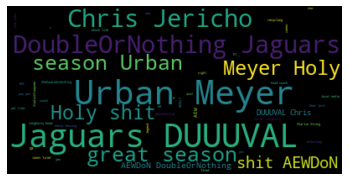

In [183]:
#visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#wordCloud = WordCloud(max_font_size=40).generate(' '.join([tweet for tweet in df_tweets['Tweets_Sentiment']]))
wordCloud = WordCloud(max_font_size=40).generate(' '.join(df_tweets['Tweets_Sentiment']))
plt.figure()
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

-Top 10 Hashtag and User

In [ ]:
def getHashtags(tweets, event):
    hashtags = []
    for tweet in tweets:
        for word in tweet.lower().split(' '):
            if word.startswith('#'):
                word = re.search('#[a-z0-9]*', word)
                word = word.group(0)
                if word != event.lower():
                    hashtags.append(word)
    return hashtags;

print(df_tweets['Screen_Name'].value_counts().nlargest(10))

df_hashtags = pd.DataFrame(getHashtags(df_tweets['Tweets'], event), columns=['Hashtags'])
print(df_hashtags['Hashtags'].value_counts().nlargest(10))

-follower of a given Twitter user from the acquired data set

In [ ]:
def twitterFollower(api, user, count):
    followers = tweepy.Cursor(api.followers, user).items(count)
    print(followers.next())
    return followers

followers = twitterFollower(api, 'Jaguars', follower_count)
df_follower = pd.DataFrame([follower.screen_name for follower in followers], columns=['Follower'])
print(df_follower)

-profiles and data of followers

In [ ]:
from tweepy import TweepError

def getFollowersProfiles(api, followers, count):
    profiles = []
    for follower in followers:
        try:
            line = tweepy.Cursor(api.user_timeline, follower).items(count)
            print("--------------" + str(line.next().user))
            for tweet in line:
                print(tweet.text)
        except TweepError:
            print("Not allowed to access profile!")
        except StopIteration:
            pass

followers_Profiles = getFollowersProfiles(api, df_follower['Follower'], tweet_count)

df_follower['location'] = np.array([profile.user.follower for profile in followers_Profiles])